# Graph Analysis
The file **adjnoun.gml** contains the network of common adjective and noun
adjacencies for the novel "David Copperfield" by Charles Dickens, as
described by M. Newman.  Nodes represent the most commonly occurring
adjectives and nouns in the book.  Node values are 0 for adjectives and 1
for nouns.  Edges connect any pair of words that occur in adjacent position
in the text of the book.  

In [61]:
import networkx as nx
adjwords = nx.read_gml('data/adjnoun.gml')

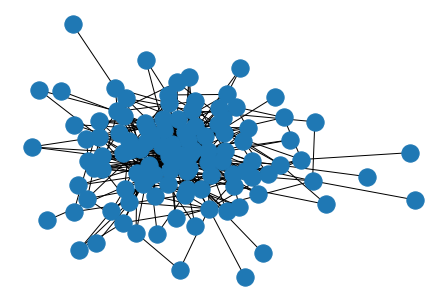

In [62]:
import matplotlib as pl
nx.draw(adjwords,pos=nx.spring_layout(adjwords))

{'agreeable': Text(-0.03104288265050761, -0.6589884560458046, 'agreeable'),
 'air': Text(-0.3511727311028074, -0.3797381975410906, 'air'),
 'alone': Text(-0.014472049133978251, -0.90874599641612, 'alone'),
 'anything': Text(0.2888137735918518, 0.8430489244751908, 'anything'),
 'arm': Text(-0.043980664223521905, 0.494816247955654, 'arm'),
 'aunt': Text(-0.8568598337487213, -0.15504180339509263, 'aunt'),
 'bad': Text(0.007484521967000581, -0.5335163694656243, 'bad'),
 'beautiful': Text(0.34346271086380703, 0.2389708233841391, 'beautiful'),
 'bed': Text(0.7056957264042348, 0.1742337514132235, 'bed'),
 'best': Text(-0.09900383565084982, -0.25614045831586435, 'best'),
 'better': Text(0.19501243088439257, 0.09890582503874022, 'better'),
 'black': Text(-0.029141987882158164, 0.1663507175510777, 'black'),
 'boy': Text(0.11992017385541551, -0.1506123876031118, 'boy'),
 'bright': Text(-0.3008392977107478, 0.04012660875553463, 'bright'),
 'certain': Text(-0.1812604310863863, -0.282631082221452, '

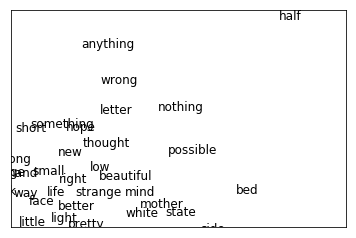

In [63]:
nx.draw_networkx_labels(adjwords,pos=nx.spring_layout(adjwords))

## Adjacency Matrix
Let's get the adjacency matrix for that graph, in sparse matrix representation. 
Because a matrix only holds numerical information, we need to maintain a separate list of names corresponding to the graph nodes.

In [64]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
words = np.array(list(adjwords.nodes()))  # array for multi-indexing
Adj = nx.to_scipy_sparse_matrix(adjwords, dtype=np.float64)
Adj

<112x112 sparse matrix of type '<class 'numpy.float64'>'
	with 850 stored elements in Compressed Sparse Row format>

Here is the list of nodes(words) in our matrix

In [65]:
words

array(['strong', 'first', 'agreeable', 'door', 'side', 'dark', 'love',
       'black', 'place', 'little', 'fancy', 'letter', 'late', 'word',
       'day', 'white', 'open', 'morning', 'young', 'friend', 'greater',
       'same', 'other', 'time', 'perfect', 'name', 'heart', 'manner',
       'better', 'new', 'family', 'red', 'usual', 'face', 'woman',
       'person', 'air', 'thing', 'moment', 'best', 'master', 'right',
       'beautiful', 'fire', 'state', 'low', 'lost', 'hand', 'possible',
       'mind', 'pretty', 'hope', 'voice', 'pleasant', 'kind', 'general',
       'world', 'thought', 'light', 'something', 'work', 'room', 'half',
       'aunt', 'round', 'miserable', 'bed', 'eye', 'way', 'evening',
       'common', 'anything', 'house', 'course', 'poor', 'long', 'certain',
       'boy', 'child', 'whole', 'man', 'early', 'small', 'old', 'year',
       'true', 'good', 'happy', 'natural', 'wrong', 'strange', 'bad',
       'large', 'night', 'life', 'ready', 'head', 'great', 'short',
       '

In [66]:
import pandas as pd
pd.DataFrame(words[:20]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,strong,first,agreeable,door,side,dark,love,black,place,little,fancy,letter,late,word,day,white,open,morning,young,friend


From the adjacency matrix, we will derive a **transition probability matrix**, where:

- Every 1-edge is replaced by a probability of 1 over the number of edges from each word. 

The total number of words in our matrix is going to be used a lot, so let's call it $n$:

In [67]:
n = len(words)
Adj

<112x112 sparse matrix of type '<class 'numpy.float64'>'
	with 850 stored elements in Compressed Sparse Row format>

To reveal `Adj`:

In [68]:
Adj.todense()

matrix([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

To make it look pretty, using pandas

In [69]:
pd.DataFrame(Adj.todense())

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since we divide by a lot of numbers, some of which can be zero, we use a numpy capability: `np.seterr(divide='ignore')`.

Lets obtain degrees, and build a diagonal matrix with each $(i,i)$ node containing the inverse of the degree for that node:

In [70]:
np.seterr(divide='ignore')  # ignore division-by-zero errors

degrees = np.ravel(Adj.sum(axis=1))
Deginv = sparse.diags(1 / degrees).tocsr()

Since adjacency matrices are often sparse, and filled with only ones, plotting them cam be quite informative. Lets plot the matrix

In [71]:
## Matrix plotting function

import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(10, 5))
    # you may have to replace 'axisbg' below with 'facecolor', depending on the version of your matplotlib
    ax = fig.add_subplot(111, facecolor='black') #axisbg='b')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

Let's plot the diagonal matrix made of the inverse of the degrees of each node and also our adjacent words matrix.

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


<Figure size 432x288 with 0 Axes>

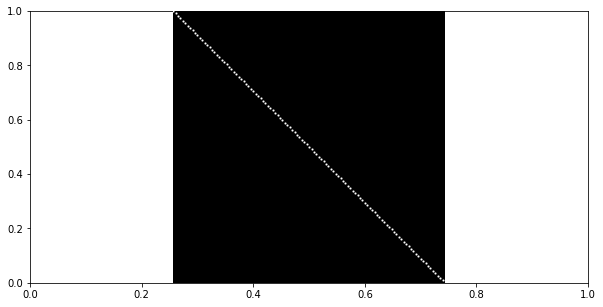

In [72]:
m = sparse.diags(1 / degrees).tocoo()
ax = plot_coo_matrix(m)
ax.figure.show()

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


<Figure size 432x288 with 0 Axes>

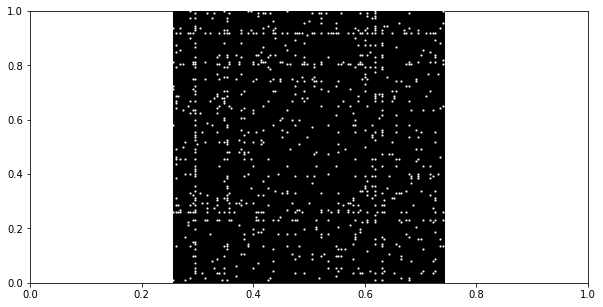

In [73]:
A = Adj.tocoo()
ax = plot_coo_matrix(A)
ax.figure.show()

And for ascii style, with degrees on the right margin:

In [74]:
dense = Adj.todense()

for i in range(112):
    for row in dense[i]:
        numbers =[ np.vectorize(np.int)(x) for x in row ]
        degrees = np.sum(numbers)
        print(''.join(str(i) for i in numbers).replace(' ', '').replace('\n', '') + ' ' + str(degrees))

[[0000000100000000000001000000000110000000000000010000000000000000000000000000000000010000000000000000000000000001]] 7
[[0000000001000010010000010000000000010110100000000000000001001101000001000000010010010000000000000100000000000000]] 17
[[0000000000000000000000000000000000010000000000000000000000000000000000000000000010010000000000000000000000000000]] 3
[[0000000101000000100000100000000000000000000000000000000000000100000000000000000000110000000000000000000000000000]] 7
[[0000000000000000000000100000000000000000010000000000000010000000000000000000000000000000000000000000000000000000]] 3
[[0000000000000000000000000000000000000000000000000000001000000100000100000000000000000000000001000000000000000001]] 5
[[0000000001000000000000000000000000000001000000000000000000000000000000000000000000010001100000000000000000000000]] 5
[[1001000001010000000000000000000000000100001000000000000000000000000100000001000010010000000000000100000000000010]] 12
[[00000000010000000000011000001000100000000100

And now the **Transition matrix**.
Computing the transition matrix in the way below, because mutliplying a matrix by a diagonal matrix of factors will mutliply each entry in the matrix by its associated factor, which is the probability of finding the words adjacent to each other.

In [75]:
Trans = (Deginv @ Adj).T
Trans

<112x112 sparse matrix of type '<class 'numpy.float64'>'
	with 850 stored elements in Compressed Sparse Column format>

Let's verify by examining the first row:

In [76]:
dTrans = Trans.T.todense()
dTrans[0]

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.14285714, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.14285714, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.14285714, 0.14285714, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.14285714, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

### Searching for the Dominant Eigenvector


If we call the transition matrix $M$ and the vector of PageRank values (dominant eigenvector) $r$, we have:

$$
\boldsymbol{r} = M\boldsymbol{r}
$$


In [77]:
from scipy.sparse.linalg import spsolve

damping = 0.85
beta = 1 - damping

I = sparse.eye(n, format='csc')  # Same sparse format as Trans

pagerank = spsolve(I - damping * Trans,
                   np.full(n, beta / n))

And here's the PageRank for each word:

In [78]:
degrees = np.ravel(Adj.sum(axis=0))

In [79]:
import pandas as pd
for i, (s, d, p) in enumerate(zip(words, degrees, pagerank)):
    print(i, s, '(' + str(d) + ')', p)

0 strong (7.0) 0.008033146612051461
1 first (17.0) 0.020149460885285027
2 agreeable (3.0) 0.004232986058790635
3 door (7.0) 0.00795394650539012
4 side (3.0) 0.004797388046502933
5 dark (5.0) 0.006120755586627472
6 love (5.0) 0.006429922295323405
7 black (12.0) 0.013019424426067011
8 place (12.0) 0.013175639256691667
9 little (49.0) 0.05050493971013088
10 fancy (1.0) 0.0026203079368733607
11 letter (3.0) 0.004164523971822863
12 late (3.0) 0.004206618289859549
13 word (6.0) 0.006962211866421322
14 day (7.0) 0.009511606733169824
15 white (3.0) 0.004047009146355192
16 open (3.0) 0.004231222662563414
17 morning (4.0) 0.005603165705816743
18 young (14.0) 0.015158321164430536
19 friend (10.0) 0.010435321846732784
20 greater (2.0) 0.003459988523741581
21 same (21.0) 0.02200377870999266
22 other (28.0) 0.029401578910815223
23 time (11.0) 0.011895253610301516
24 perfect (2.0) 0.00336434289175727
25 name (1.0) 0.0022591153116352136
26 heart (5.0) 0.008239576368972082
27 manner (6.0) 0.00754058958

Function to scatter-plot PageRank versus in-degree for named nodes.

In [80]:
def pagerank_plot(degrees, pageranks, names, *,
                  annotations=[], **figkwargs):
    """Plot node pagerank against degree, with hand-picked node names."""

    fig, ax = plt.subplots(**figkwargs)
    ax.scatter(in_degrees, pageranks, c=[0.835, 0.369, 0], lw=0)
    for name, indeg, pr in zip(names, in_degrees, pageranks):
        if name in annotations:
            text = ax.text(indeg + 0.1, pr, name)

    ax.set_ylim(0, np.max(pageranks) * 1.1)
    ax.set_xlim(-1, np.max(in_degrees) * 1.1)
    ax.set_ylabel('PageRank')
    ax.set_xlabel('Degree')

We pre-label some interesting nodes in the plot:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


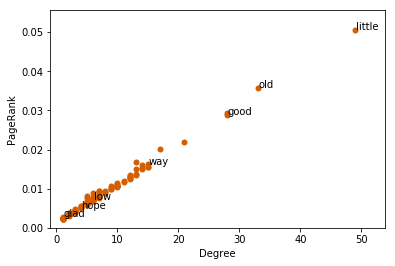

In [81]:
interesting = ['good','low','hope','way','little','old','glad']

pagerank_plot(in_degrees, pagerank, words, annotations=interesting)

So , from this graph , we can conclude that the word **'little'** is used in adjacency to large number of words comparatively and **'glad'** is the least adjacent word.

## Now using the Power method

In [82]:
def power(M, damping=0.85, max_iter=10**5):
    n = M.shape[0]
    r0 = np.full(n, 1/n)
    r = r0
    for _iter_num in range(max_iter):
        rnext = damping * M @ r + (1 - damping) / n
        if np.allclose(rnext, r):
            break
        r = rnext
    return r

A transition matrix needs to be *column-stochastic*, in which all column entries sum to 1: Lets verify

In [83]:
rows = 0
for i in range(112):
    if (np.sum((Trans.todense().T)[i]) != 1.):
        rows += 1
print("non stochastic rows: " + str(rows))

non stochastic rows: 13


So there are 13 non stochastic rows. 
Let's take a peek.

In [84]:
for i in range(112):
    print(np.sum((Trans.todense().T)[i]))

0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [85]:
def power2(M, damping=0.85, max_iter=10**5):
    n = M.shape[0]
    dangling = (1/n) * np.ravel(M.sum(axis=0) == 0)
    r0 = np.full(n, 1/n)
    r = r0
    for _ in range(max_iter):
        rnext = (damping * (M @ r + dangling @ r) +
                 (1 - damping) / n)
        if np.allclose(rnext, r):
            return rnext
        else:
            r = rnext
    return r

Even though `power2` is more correct, it will give the same ranking as `power`.

Verifying that these three methods all give the same ranking for the
nodes using `numpy.corrcoef` function.

`np.corrcoef` gives the **Pearson correlation** coefficient between
all pairs of a list of vectors.A correlation
coefficient of 1 is sufficient to show that the above methods produce the same
ranking.

In [86]:
pagerank_power = power(Trans)
pagerank_power2 = power2(Trans)
np.corrcoef([pagerank, pagerank_power, pagerank_power2])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Let's double-check:

In [87]:
for i, (s, pr, prp, prp2) in enumerate(zip(words, pagerank, pagerank_power, pagerank_power2)):
    print(i, s, pr, prp, prp2, prp/prp2)

0 strong 0.008033146612051461 0.008033136508584064 0.008033149154426194 0.9999984257926888
1 first 0.020149460885285027 0.02014950618257531 0.020149430149376688 1.0000037734664484
2 agreeable 0.004232986058790635 0.00423299047902343 0.004232982516365519 1.0000018810987006
3 door 0.00795394650539012 0.00795393760586418 0.007953948670892367 0.9999986088635161
4 side 0.004797388046502933 0.0047973952350897475 0.0047973872738039216 1.0000016595045118
5 dark 0.006120755586627472 0.006120760830908055 0.006120749348110426 1.000001876044415
6 love 0.006429922295323405 0.006429902624957187 0.006429934498467769 0.9999950429494128
7 black 0.013019424426067011 0.013019422055680619 0.01301941838257214 1.0000002821253893
8 place 0.013175639256691667 0.013175610118316325 0.013175659892932607 0.9999962222297261
9 little 0.05050493971013088 0.05050496310450185 0.050504920307338205 1.0000008473860247
10 fancy 0.0026203079368733607 0.00262030576246511 0.002620309161600738 0.9999987027730629
11 letter 0.0

# Conclusion
We can conclude that all 3 methods produce the same results and also we can infer that 
**Highest PageRank word is 'little' at 0.05. 2nd highest PageRank? 'Old'  at 0.0357**. It implies that the word 'little' is used  adjacent word to many words.
